In [1]:
import pandas as pd            
import numpy as np               
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv(r"D:\new sql data\Sales_analysis\all_data.csv")

In [3]:
df.head()

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount
0,Patrick Graham,Washington,West,Jeremy Baker,2016/04/01,Junk,8,12.42,99.36
1,Frances Warren,New Jersey,East,Albert Dunn,2016/04/01,Widgets,9,53.35,480.15
2,Sara Snyder,New York,East,Robert Hayes,2016/04/01,Junk,4,12.42,49.68
3,Randy Watson,New York,East,Cheryl Riley,2016/04/01,Widgets,5,53.35,266.75
4,Randy Watson,New Jersey,East,Kimberly Coleman,2016/04/01,Widgets,2,53.35,106.70


In [4]:
df.shape

(1944, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales Representative  1944 non-null   object 
 1   Location              1944 non-null   object 
 2   Region                1944 non-null   object 
 3   Customer              1944 non-null   object 
 4   Order Date            1944 non-null   object 
 5   Item                  1944 non-null   object 
 6   Quantity              1944 non-null   int64  
 7   Price                 1944 non-null   float64
 8   Total Sale Amount     1944 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 136.8+ KB


There are no-null values in dataset

### Changing datatype of - Price, Total sales amount ,Order date columns to pandas dataframe.

In [6]:
df['Price']=pd.to_numeric(df['Price'])
df['Total Sale Amount']=pd.to_numeric(df['Total Sale Amount'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sales Representative  1944 non-null   object        
 1   Location              1944 non-null   object        
 2   Region                1944 non-null   object        
 3   Customer              1944 non-null   object        
 4   Order Date            1944 non-null   datetime64[ns]
 5   Item                  1944 non-null   object        
 6   Quantity              1944 non-null   int64         
 7   Price                 1944 non-null   float64       
 8   Total Sale Amount     1944 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 136.8+ KB


### Adding column - Day , Month , Year.

In [8]:
df['day']=(df['Order Date']).dt.day
df['month']=(df['Order Date']).dt.month
df['year']=(df['Order Date']).dt.year

Further Analysis is perform on following basis :
1] Sales Representative Analysis.
2] Location Analysis.
3] Region Analysis.
4] Customer Analysis.
5] Order Date Analysis.
6] Item Analysis.
7] Quantity and Price Analysis.

## 1] Sales Representative Analysis

In [9]:
### Which sales representative has the highest sales performance?

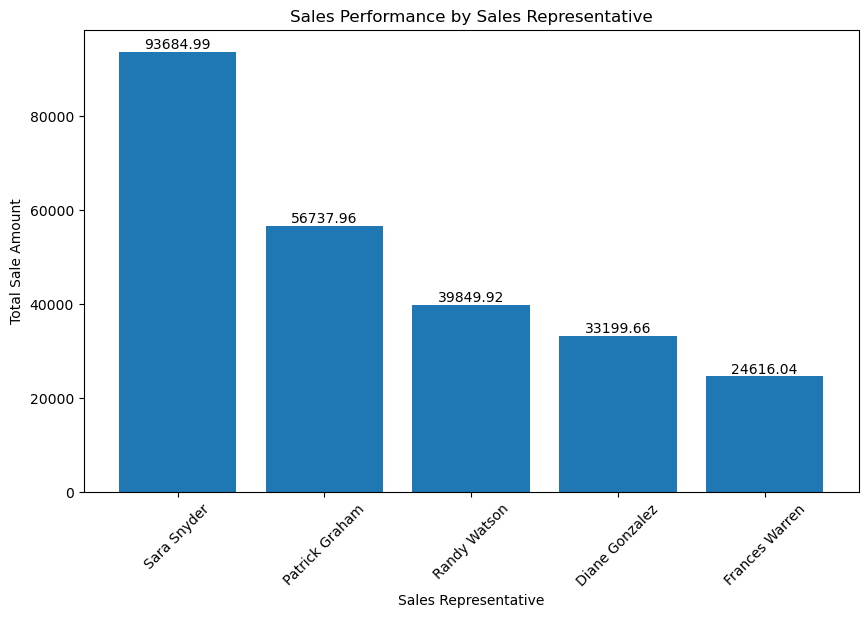

In [10]:
sales_rep_sales = df.groupby('Sales Representative')['Total Sale Amount'].sum().reset_index()

sales_rep_sales = sales_rep_sales.sort_values(by='Total Sale Amount', ascending=False)

plt.figure(figsize=(10, 6))

plt.bar(sales_rep_sales['Sales Representative'], sales_rep_sales['Total Sale Amount'])

for i, value in enumerate(sales_rep_sales['Total Sale Amount']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Sales Representative')

plt.ylabel('Total Sale Amount')

plt.title('Sales Performance by Sales Representative')

plt.xticks(rotation=45)

plt.show()


The top sales performers based on the chart are as follows:
1. Sara Snyder
2. Patrick Graham
3. Randy Watson
4. Diane Gonzalez
5. Frances Warren

In [11]:
### What is the sales frequency rate for Sara Snyder compared to Frances Warren, based on the chart?

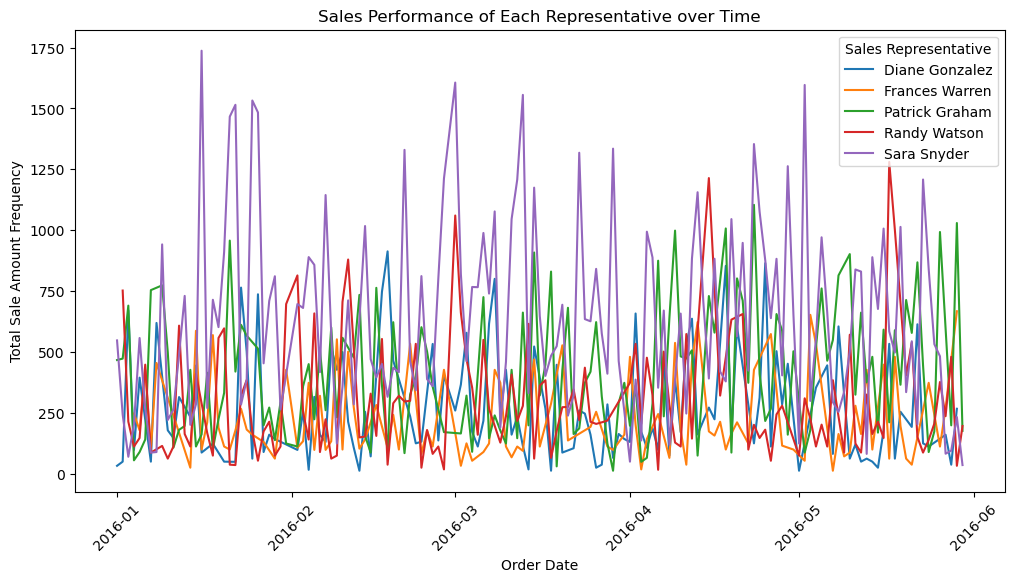

In [12]:
sales_performance = df.groupby(['Sales Representative', 'Order Date'])['Total Sale Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='Order Date', y='Total Sale Amount', hue='Sales Representative', data=sales_performance)

plt.xlabel('Order Date')

plt.xticks(rotation=45)

plt.ylabel('Total Sale Amount Frequency')

plt.title('Sales Performance of Each Representative over Time')

plt.show()


From the chart, it can be observed that Sara Snyder has the highest sales frequency rate among the sales representatives, while Frances Warren has the lowest sales frequency rate.

In [13]:
### What is the distribution of sales representatives across different regions?

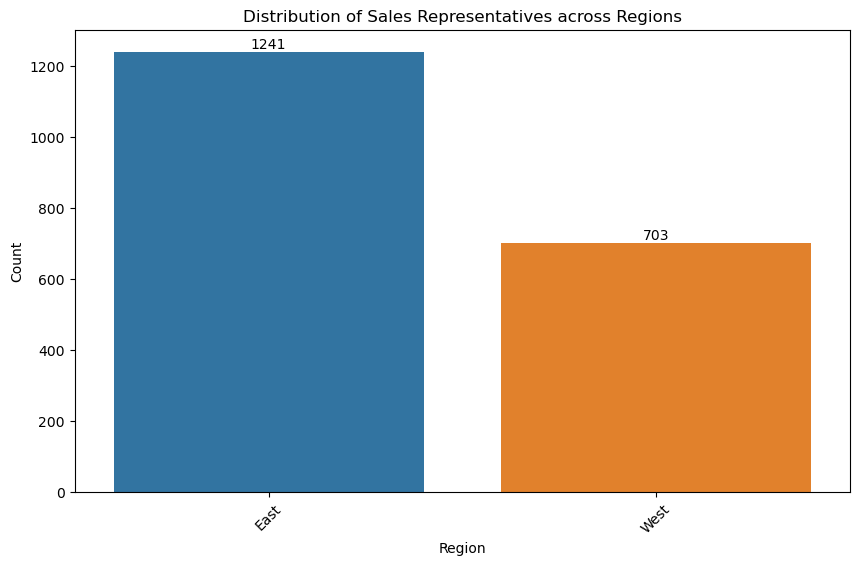

In [14]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=region_counts.index, y=region_counts.values)

for i, count in enumerate(region_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Region')

plt.xticks(rotation=45)

plt.ylabel('Count')

plt.title('Distribution of Sales Representatives across Regions')

plt.show()

There are 1241 sales representatives in East and 703 sales represe

### 2] Location Analysis:

In [15]:
### Which location has the highest total sales amount?

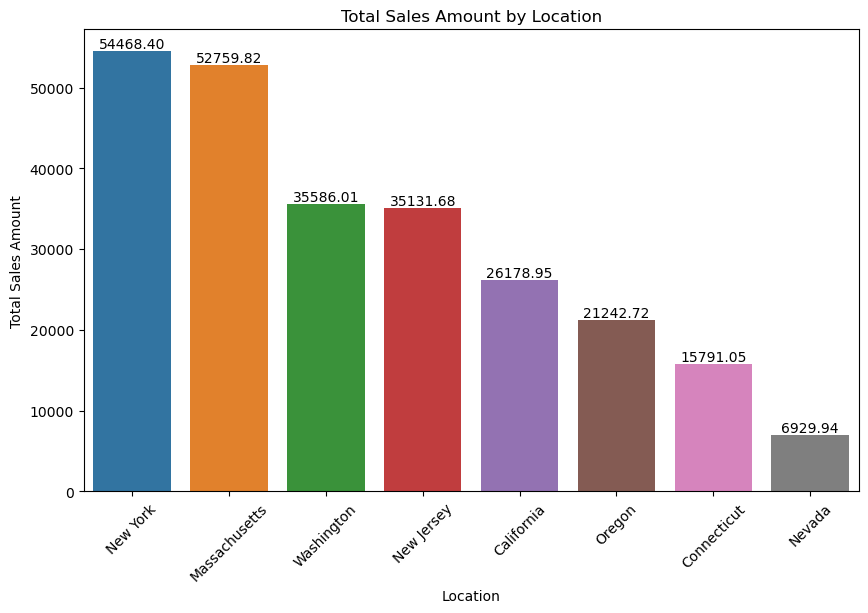

In [16]:
location_sales = df.groupby('Location')['Total Sale Amount'].sum().reset_index()

location_sales = location_sales.sort_values(by='Total Sale Amount', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='Location', y='Total Sale Amount', data=location_sales)

plt.xlabel('Location')

plt.ylabel('Total Sales Amount')

plt.title('Total Sales Amount by Location')

plt.xticks(rotation=45)
for index, row in enumerate(location_sales['Total Sale Amount']):
    plt.text(index, row, f"{row:.2f}", ha='center', va='bottom')

plt.show()


Based on the bar graph, the locations with the highest total sales amount in descending order are: New York, Massachusetts, Washington, New Jersey, California, Oregon, Connecticut. On the other hand, Nevada has the lowest sales amount.

In [17]:
### Which locations have the highest total sales count?

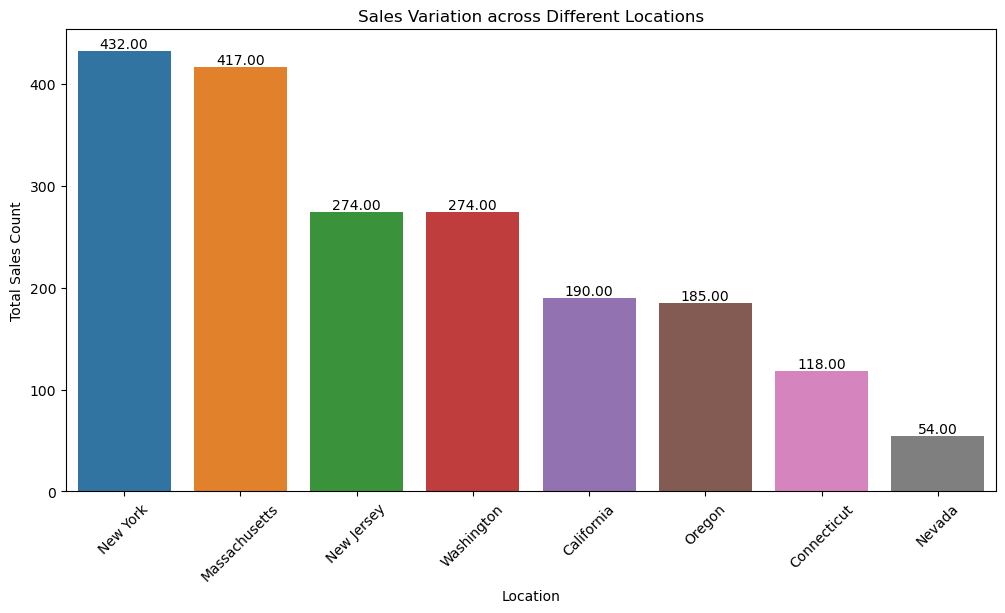

In [18]:
location_sales = df.groupby('Location')['Total Sale Amount'].count().reset_index()

location_sales = location_sales.sort_values(by='Total Sale Amount', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(x='Location', y='Total Sale Amount', data=location_sales)

plt.xlabel('Location')

plt.ylabel('Total Sales Count')

plt.title('Sales Variation across Different Locations')

plt.xticks(rotation=45)

for index, row in enumerate(location_sales['Total Sale Amount']):
    plt.text(index, row, f"{row:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

Based on the bar graph, the locations with the highest total sales count in descending order are: New York, Massachusetts,
New Jersey,Washington,California, Oregon, Connecticut. On the other hand, Nevada has the lowest sales count.

### 3] Region Analysis:

In [19]:
### What are the sales trends across different regions?

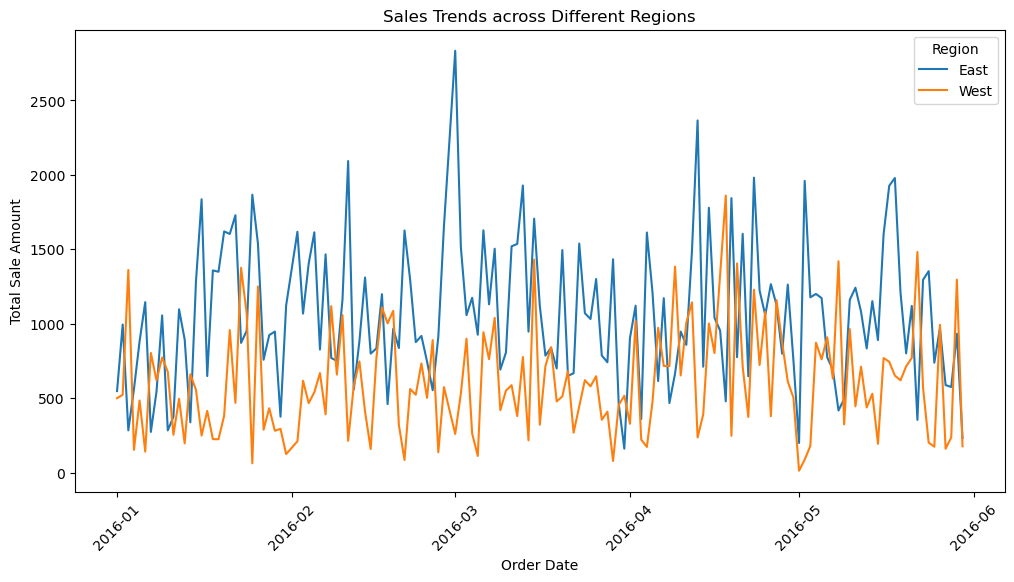

In [20]:
sales_trends = df.groupby(['Region', 'Order Date'])['Total Sale Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='Order Date', y='Total Sale Amount', hue='Region', data=sales_trends)

plt.xlabel('Order Date')

plt.xticks(rotation=45)

plt.ylabel('Total Sale Amount')

plt.title('Sales Trends across Different Regions')

plt.show()


Sales trends of east and west region.

In [21]:
### Which region has the highest number of customers?

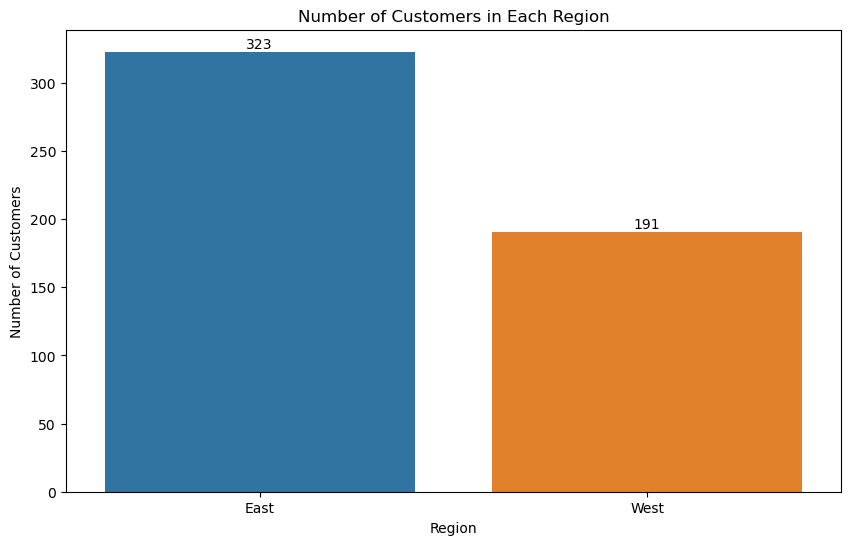

In [22]:
customer_count = df.groupby('Region')['Customer'].nunique().reset_index()

customer_count = customer_count.sort_values(by='Customer', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='Region', y='Customer', data=customer_count)

plt.xlabel('Region')

plt.ylabel('Number of Customers')

plt.title('Number of Customers in Each Region')

for i, row in customer_count.iterrows():
    plt.text(row.name, row.Customer, row.Customer, ha='center', va='bottom')

plt.show()


The region with the highest number of customers is the East, with 323 customers, followed by the West with 191 customers.

In [23]:
### Which region makes the most significant contribution to the total sales?

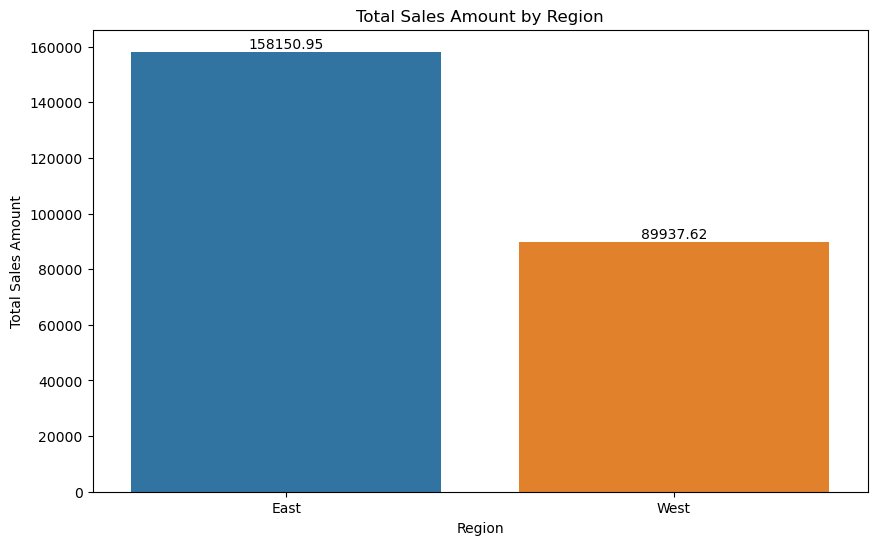

In [24]:
region_sales = df.groupby('Region')['Total Sale Amount'].sum().reset_index()

region_sales = region_sales.sort_values(by='Total Sale Amount', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='Region', y='Total Sale Amount', data=region_sales)

for index, row in region_sales.iterrows():
    plt.text(index, row['Total Sale Amount'], row['Total Sale Amount'], ha='center', va='bottom')

plt.xlabel('Region')

plt.ylabel('Total Sales Amount')

plt.title('Total Sales Amount by Region')

plt.show()

Based on the graph, it can be observed that the East region is contributing more to the total sales compared to the West region.

### 4] Customer Analysis

In [25]:
### Who are the top customers based on total sales amount?

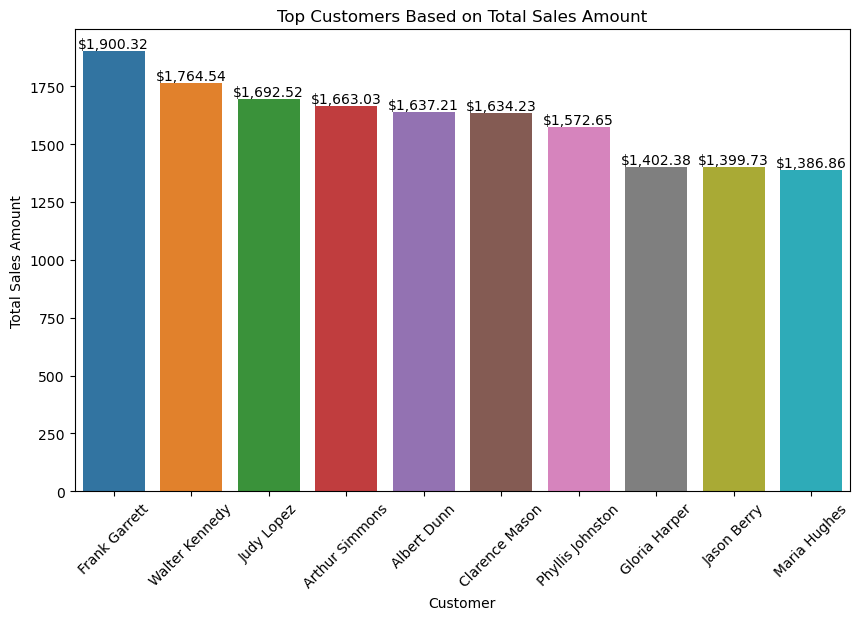

In [26]:
total_sales_by_customer = df.groupby('Customer')['Total Sale Amount'].sum()

total_sales_by_customer = total_sales_by_customer.sort_values(ascending=False)

top_customers = total_sales_by_customer.head(10)

plt.figure(figsize=(10, 6)) 

sns.barplot(x=top_customers.index, y=top_customers.values)

for i, amount in enumerate(top_customers.values):
    plt.text(i, amount, f"${amount:,.2f}", ha='center', va='bottom')

plt.xlabel('Customer')

plt.ylabel('Total Sales Amount')

plt.title('Top Customers Based on Total Sales Amount')

plt.xticks(rotation=45)

plt.show()

Top ten customer based on total sales amount

In [27]:
### Who are the top customers based on total sales count?

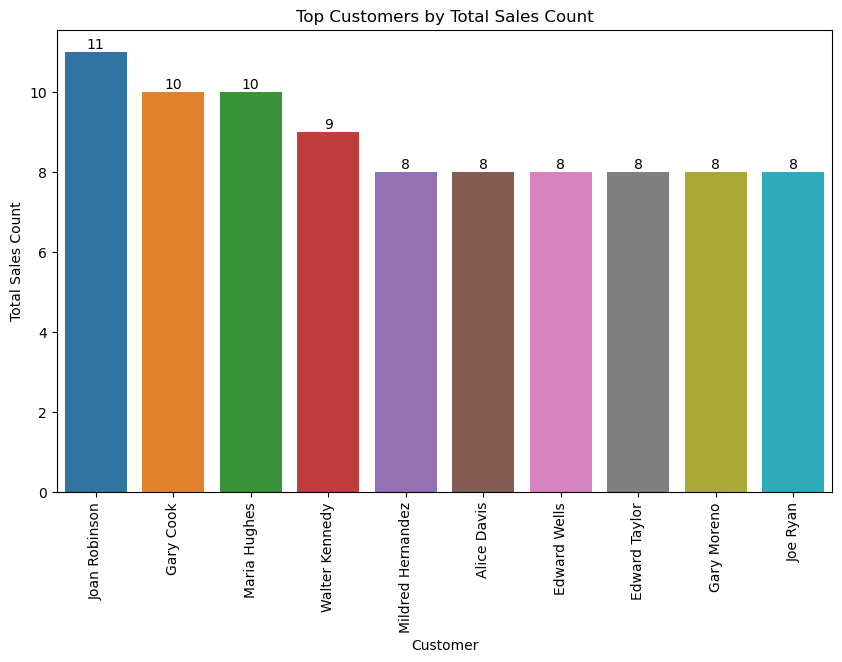

In [28]:
customer_sales = df.groupby('Customer')['Total Sale Amount'].count().reset_index()

customer_sales = customer_sales.sort_values(by='Total Sale Amount', ascending=False)

top_customers = customer_sales.head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Customer', y='Total Sale Amount', data=top_customers)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Customer')

plt.ylabel('Total Sales Count')

plt.title('Top Customers by Total Sales Count')

plt.xticks(rotation=90)

plt.show()

The top customers based on total sales count

In [29]:
### Which customer segment has the highest total sales amount?

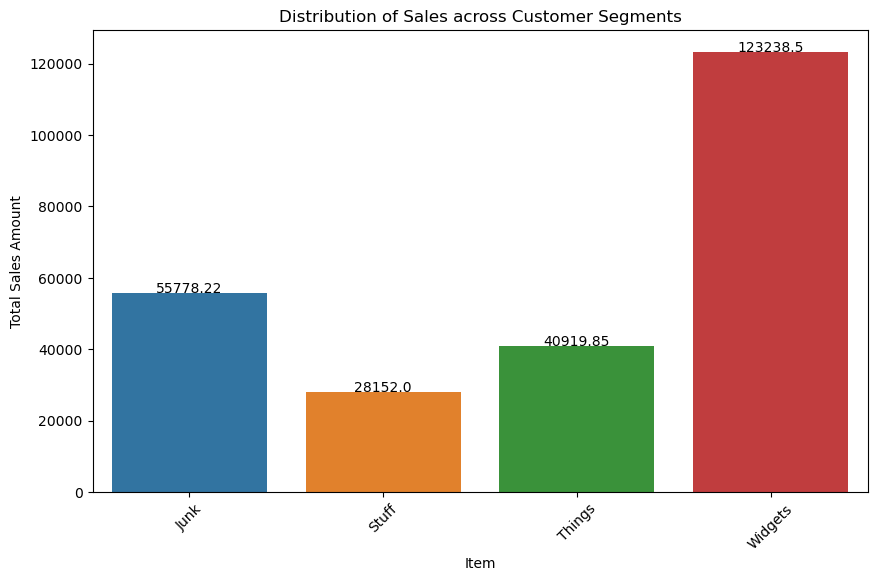

In [30]:
segment_sales = df.groupby('Item')['Total Sale Amount'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Item', y='Total Sale Amount', data=segment_sales)


for index, row in segment_sales.iterrows():
    plt.text(index, row['Total Sale Amount'], row['Total Sale Amount'], ha='center')


plt.xlabel('Item')
plt.xticks(rotation=45)

plt.ylabel('Total Sales Amount')


plt.title('Distribution of Sales across Customer Segments')


plt.show()


The customer segment with the highest total sales amount is "Widgets".

In [31]:
### What is the percentage contribution of each item segment to the total sales amount?

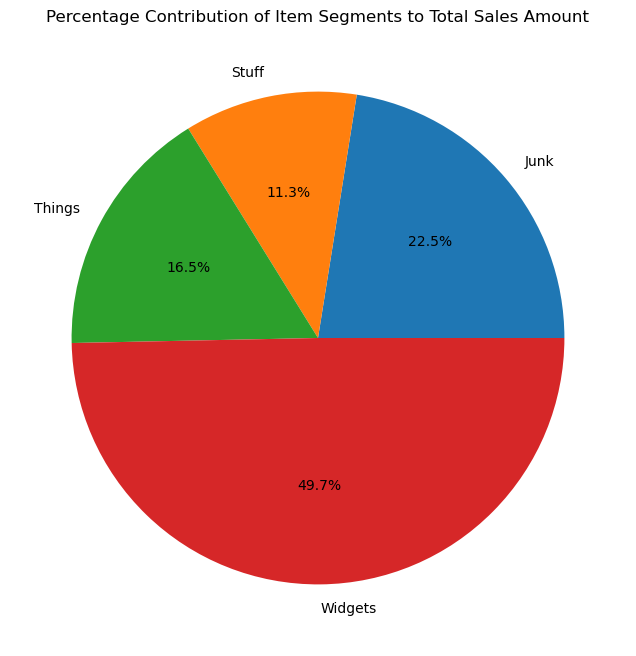

In [32]:
segment_sales = df.groupby('Item')['Total Sale Amount'].sum()

percentage_contribution = segment_sales / segment_sales.sum() * 100

plt.figure(figsize=(8, 8))

plt.pie(percentage_contribution, labels=percentage_contribution.index, autopct='%1.1f%%')

plt.title('Percentage Contribution of Item Segments to Total Sales Amount')

plt.show()


Widgets itme segment contribute around 50% in total sales amount. 

### 5] Order Date Analysis

In [33]:
### What is the overall sales trend over time?

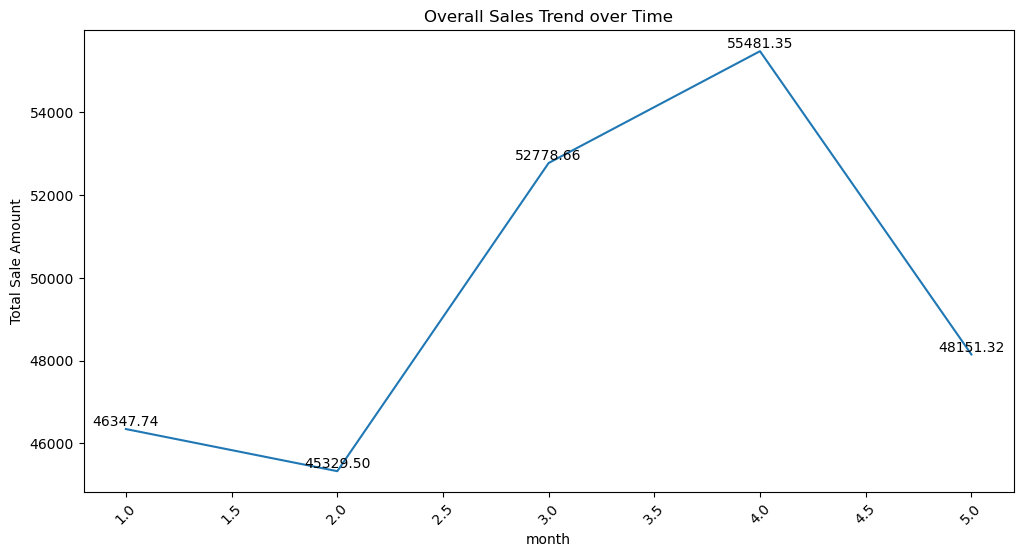

In [34]:
sales_trend = df.groupby('month')['Total Sale Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='month', y='Total Sale Amount', data=sales_trend)

plt.xlabel('month')

plt.ylabel('Total Sale Amount')

plt.title('Overall Sales Trend over Time')

plt.xticks(rotation=45)

for i in range(len(sales_trend)):
    plt.text(sales_trend['month'][i], sales_trend['Total Sale Amount'][i],
             f"{sales_trend['Total Sale Amount'][i]:.2f}",
             ha='center', va='bottom')
plt.show()

The overall sales trend over time shows a fluctuations. This indicates a positive growth in sales over time.

### 6] Item Analysis

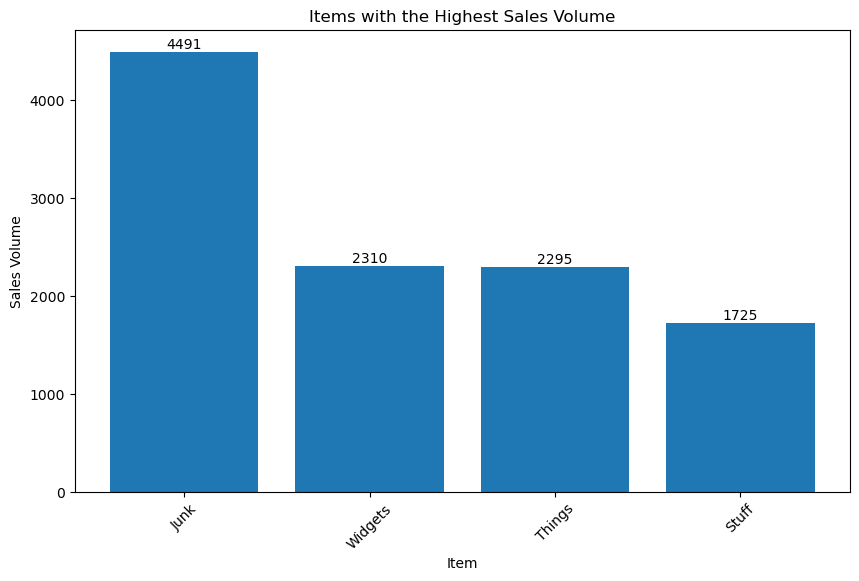

In [35]:
item_sales = df.groupby('Item')['Quantity'].sum().reset_index()

item_sales = item_sales.sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(10, 6))

plt.bar(item_sales['Item'], item_sales['Quantity'])

plt.xlabel('Item')

plt.ylabel('Sales Volume')

plt.title('Items with the Highest Sales Volume')

for i, value in enumerate(item_sales['Quantity']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

Based on the data, the item with the highest sales volume is "Junk".

In [36]:
### What is the average price of items

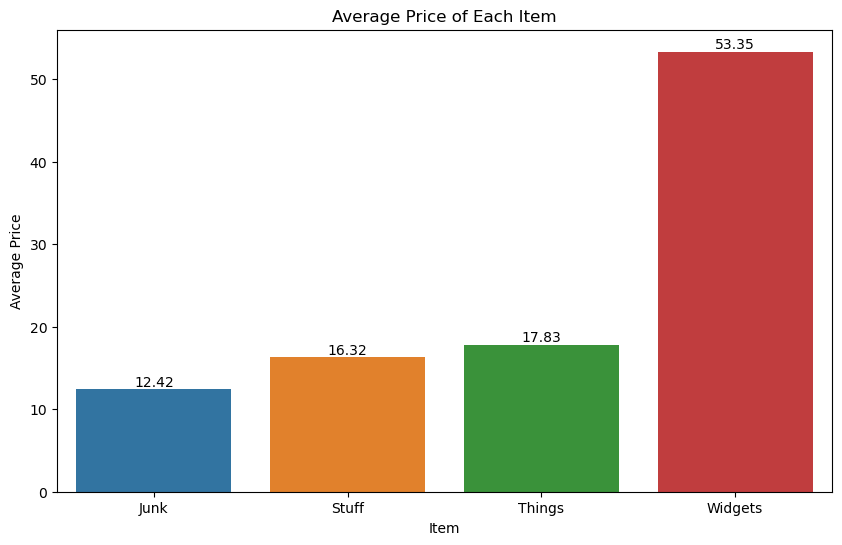

In [37]:
item_stats = df.groupby('Item').agg({'Price': 'mean', 'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Item', y='Price', data=item_stats)

plt.xlabel('Item')

plt.ylabel('Average Price')

plt.title('Average Price of Each Item')

for i, v in enumerate(item_stats['Price']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

Widgets segment has the highest average price

In [38]:
### What is the average quantity of items sold for each item segment?

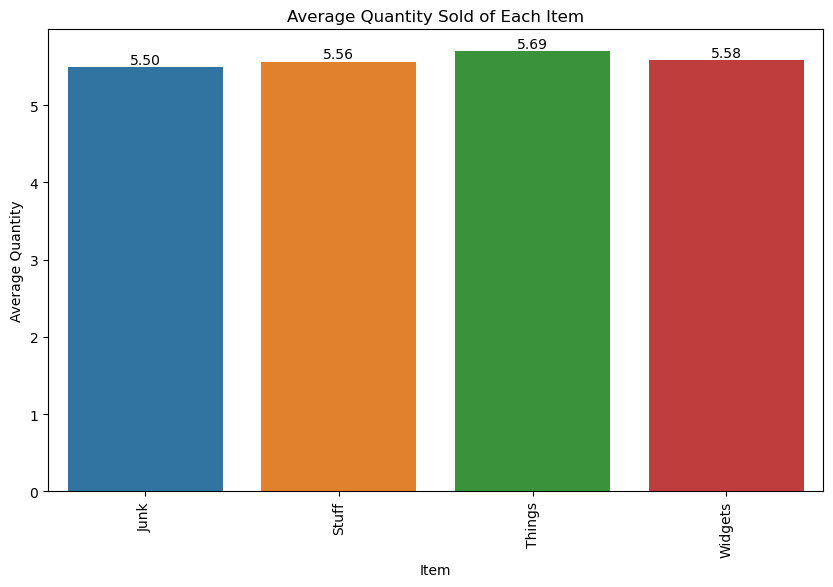

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Item', y='Quantity', data=item_stats)

plt.xlabel('Item')

plt.ylabel('Average Quantity')

plt.title('Average Quantity Sold of Each Item')

for i, v in enumerate(item_stats['Quantity']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.xticks(rotation=90)

plt.show()

The item "Thing" has the highest average quantity sold.

### 7] Quantity and Price Analysis

In [40]:
### Does the quantity of items sold have an impact on the total sales amount?

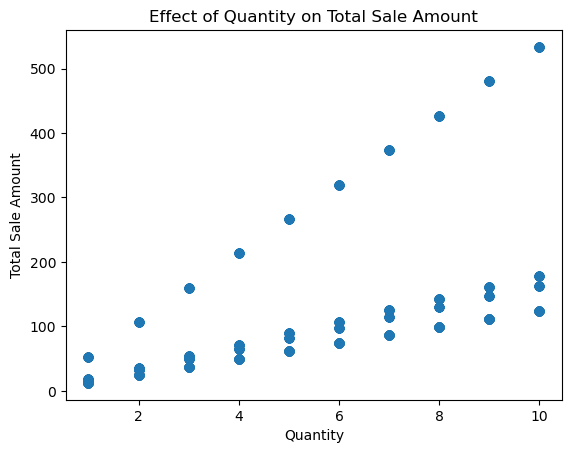

In [41]:
plt.scatter(df['Quantity'], df['Total Sale Amount'])

plt.xlabel('Quantity')

plt.ylabel('Total Sale Amount')

plt.title('Effect of Quantity on Total Sale Amount')

plt.show()

The graph indicates that there is a positive relationship between low price and high sales.

In [42]:
### How is the total sales amount distributed across the dataset?

Text(0.5, 1.0, 'Distribution of Total Sales Amount')

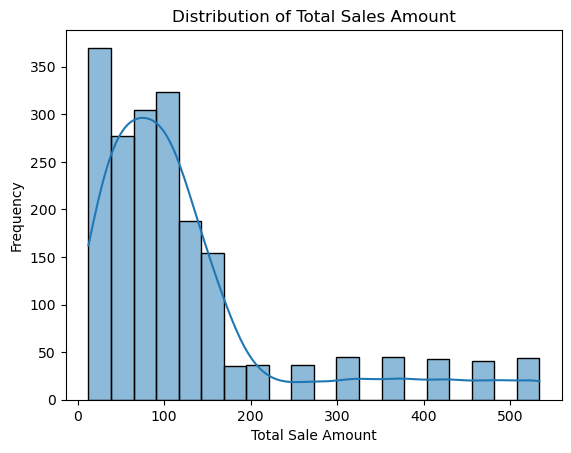

In [43]:
sns.histplot(data=df, x='Total Sale Amount', bins=20, kde=True)

plt.xlabel('Total Sale Amount')

plt.ylabel('Frequency')

plt.title('Distribution of Total Sales Amount')